In [6]:
%pylab inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cPickle as pickle
import gzip
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [7]:
#Load Data

PNdata = pickle.load(gzip.open('Data/PNdata.pklz'))
pulse_labelsPN = pickle.load(gzip.open('Data/pulselabelsPN.pklz','rb'))
# The PN data was recorded on the following days
PNDates = ('03_21','03_22','03_23','03_24','03_29','03_31','04_27','05_02')

LNdata = pickle.load(gzip.open('Data/LNdata.pklz','rb'))
pulse_labelsLN = pickle.load(gzip.open('Data/pulselabelsLN.pklz','rb'))

dt = 1/20000. #20kHz sampling rate

In [8]:
number_of_datasetsPN = 5
number_of_datasetsLN = 8

stim_start = 1 #seconds
stim_end   = 5 #seconds

idx_stim_start = int(stim_start/dt)
idx_stim_end =   int(stim_end/dt)

th = 0. # use threshold of 0 mV for AP detection. the AP waveform is not very noise so the below works

In [9]:
def local_maxima(d):
    '''
    returns bool array with the same shape as `d` with elemets at the position of local maxima in `d` are set to `True`
    this function simply checks if the neighbouring elements are smaller or equal and is __sensitive to noise__
    '''
    return r_[True, d[1:] >= d[:-1]] & r_[d[:-1] > d[1:], True]

# Plot different sweeps for all the neurons

In [23]:
#LNs
def plt_sweeps(data, nidx):
    n_sweeps = len(data[nidx])

    for i,sweep in enumerate(data[nidx]):
        subplot(n_sweeps,1,i+1)
        plot(sweep)
        
def plt_all_sweeps(data, number_of_datasets):
    '''
    ToDo
    - plot the neuron index
    '''
    for nidx in arange(number_of_datasets):
        figure()
        plt_sweeps(data,nidx)

In [ ]:
plt_all_sweeps(LNdata, number_of_datasetsLN)

# ToDo's

- for each neuron, find the minimal current that elicits an spiking response
- properly label the xaxes of the transfer functions (current vs rate) 
- replot the transfer functions by offseting them with the  minimal current to spike
- look for outliers and plot them separatly
- calculate and plot mean transfer function

### PNs
- Starting pulse +10 pA from holding current with increasing current injections of +10 pA
- Sampling frequency 20 kHz
- Bassel low pass filter 2.9

In [5]:
number_of_datasetsPN = len(PNdata)

Firing_RatesPN = [[] for x in xrange(number_of_datasetsPN)]

for dataset in range(number_of_datasetsPN):
    number_of_pulses = len(pulse_labelsPN[dataset])
    for i in range(number_of_pulses):
        V = PNdata[dataset][i]
        V_maxima = (local_maxima(V) & (V>th))
        indices = V_maxima.nonzero()[0]
        Firing_RatesPN[dataset].append(int(len(indices))/(stim_end-stim_start))    


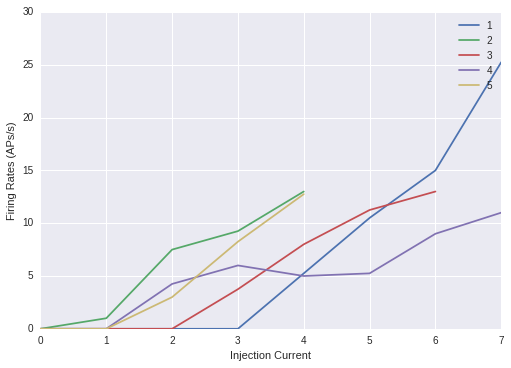

In [6]:
fig = figure()

ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel('Firing Rates (APs/s)')
ax.set_xlabel('Injection Current')

for dset in range(number_of_datasetsPN):
    current = numpy.arange(len(Firing_RatesPN[dset]))
    
    ax.plot(current,Firing_RatesPN[dset],label = dset+1)
ax.legend()
savefig('PNs.png',fmt='png',transparent=True)


show()

### LNs

- current injections in 50 pA steps
- Sampling frequency 20 kHz
- Bassel low pass filter 2.9

In [7]:
number_of_datasetsLN = len(LNdata)


Firing_RatesLN = [[] for x in xrange(number_of_datasetsLN)]
Firing_RatLN=np.array(Firing_RatesLN)
for dataset in range(number_of_datasetsLN):
    number_of_pulses = len(pulse_labelsLN[dataset])
    for i in range(number_of_pulses):

        V = LNdata[dataset][i]
        V_maxima = (local_maxima(V) & (V>th))
        indices = V_maxima.nonzero()[0]
        Firing_RatesLN[dataset].append(int(len(indices))/(stim_end-stim_start))  

are the below the holding currents ?!

[ 34  84 134 184 234 284 334]

In [8]:
holding_currents = [34,-66,-110,20,-120,-86,-52,-104] #holding (initial) injection current for each dataset

LNcurrents = [[] for x in xrange(number_of_datasetsLN)]

LNdatalength = []

for i in range(number_of_datasetsLN):
    LNdatalength.append(len(LNdata[i]))

for dataset in range(number_of_datasetsLN):
    LNcurrents[dataset].append(np.arange(holding_currents[dataset],holding_currents[dataset]+50*LNdatalength[dataset],50))

LNcurrent_list = [[] for x in xrange(number_of_datasetsLN)]
for dataset in range(number_of_datasetsLN):
    LNcurrent_list[dataset].append(LNcurrents[dataset][0].tolist())


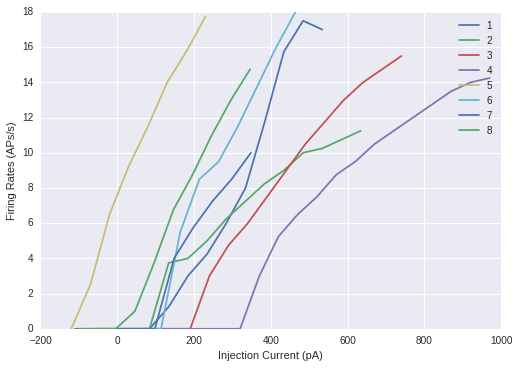

In [9]:
fig = figure()

ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel('Firing Rates (APs/s)')
ax.set_xlabel('Injection Current (pA)')
for dset in range(number_of_datasetsLN):
    ax.plot(LNcurrent_list[dset][0],Firing_RatesLN[dset],label = dset+1)
ax.legend()
savefig('LNs.png',fmt='png',transparent=True)


show()